# The Battle of the neighborhoods

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis and Results](#analysis)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction:  <a name="introduction"></a>

A young adult is in the process of making a decision about where should he buy a property for living. He currently wants to compare and have a recommendation about neighborhoods in two cities in South America where he has family: Santiago de Chile, Chile and Cali, Colombia, specifically in the communes of Ñuñoa and #22 respectively.

This kind of problem of deciding where to buy can be quite important since a property is usually an expensive purchase, people may get indebted for years and it can determine the facilities the owner has such as the time it takes to get to work or study, the perceived security, food you can get by foot or in the surroundings and in summary the quality of life.

For this project the focus will be on comparing the neighborhoods of both communes, in the cities mentioned, with a variety of spaces such as markets, gyms, parks that are at least perceived as good and can make a place worthier to live.

## Data <a name="data"></a>

Information about neighborhoods about commune 22 in Cali can be found in https://es.wikipedia.org/wiki/Comuna_22_(Cali)
Neighborhood of the commune of Ñuñoa, Chile can be found in https://es.wikipedia.org/wiki/%C3%91u%C3%B1oa. Since both links only provide data about the names of the Neighborhoods, their location is retrieved from geocoder library: https://geocoder.readthedocs.io/index.html.

The recommended neighborhoods are fetched from the Foursquare API using the _explore_ endpoint to get an idea about the nearby venues and later classify it.

>`https://api.foursquare.com/v2/venues/`**explore**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&limit=`**LIMIT**

and _likes_ endpoint for how users qualify them:
> `https://api.foursquare.com/v2/venues/`**VENUE_ID**`/likes?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&v=`**VERSION**`&limit=`**LIMIT**

In [1]:
import requests # library to handle requests
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#### First: the neighborhoods names

In [2]:
from bs4 import BeautifulSoup
cali_communes_text = requests.get('https://es.wikipedia.org/wiki/Comuna_22_(Cali)').text
soup = BeautifulSoup(cali_communes_text, 'html.parser')
c_neighborhoods = [(raw_neighborhood.string) for raw_neighborhood in soup.find_all('ul')[0].find_all('li')]
c_neighborhoods

['Urbanización Ciudad Jardín',
 'Altos de Ciudad de Jardín',
 'La Bocha',
 'Bochalema',
 'Parcelaciones Pance',
 'Urbanización Río Lili',
 'Alférez Real',
 'Ciudad Campestre',
 'Ciudad Pacífica']

In [3]:
nunoa_communes_text = requests.get('https://es.wikipedia.org/wiki/%C3%91u%C3%B1oa').text
soup = BeautifulSoup(nunoa_communes_text, 'html.parser')
n_neighborhoods = list(filter(None,[(raw_neighborhood.string) for raw_neighborhood in soup.find(id='Listado_de_barrios').parent.next_sibling.next_sibling.find_all('li')]))
n_neighborhoods

['Barrio Plaza Ñuñoa',
 'Barrio Diego de Almagro',
 'Barrio Amapolas',
 'Barrio Pucará',
 'Barrio Parque Botánico',
 'Barrio Montenegro',
 'Barrio Los Guindos o Plaza Egaña',
 'Barrio Micalvi',
 'Barrio Parque Juan XXIII',
 'Barrio José Pedro Alessandri',
 'Barrio Regina Pacis',
 'Barrio El Aguilucho',
 'Barrio Villaseca',
 'Barrio Plaza Sucre',
 'Barrio Suboficiales de Caballería',
 'Barrio Guillermo Franke',
 'Barrio Italia',
 'Barrio Pedro de Valvidia',
 'Barrio Plaza Zañartu',
 'Barrio Dr. Luis Bisquert',
 'Barrio Simón Bolívar',
 'Barrio Eusebio Lillo',
 'Barrio Parque del Deporte',
 'Barrio Estadio Nacional',
 "Barrio Bernardo O'Higgins",
 'Barrio Javiera Carrera',
 'Barrio Irarrázaval',
 'Barrio Hernán Cortés',
 'Barrio Suárez Mujica',
 'Barrio Industrial Lo Encalada',
 'Barrio Colo Colo',
 'Barrio Parque San Eugenio',
 'Barrio Empart',
 'Villa Presidente Frei',
 'Villa Los Jardines',
 'Villa Lo Plaza',
 'Villa Los Presidentes',
 'Villa Los Alerces',
 'Villa Olímpica',
 'Villa S

#### Now get their locations

In [4]:
import geocoder
c_lats = []
c_lngs = []
for c in c_neighborhoods:
    g = geocoder.arcgis('{}, Comuna 22, Cali, Valle del Cauca, Colombia'.format(c))
    c_lats.append(g.latlng[0])
    c_lngs.append(g.latlng[1])
df_c = pd.DataFrame(data={'Commune': '22, Cali, Colombia', 'Neighbourhood': c_neighborhoods, 'Latitude': c_lats, 'Longitude': c_lngs})
df_c.head()
    

,Commune,Neighbourhood,Latitude,Longitude
0,"22, Cali, Colombia",Urbanización Ciudad Jardín,3.36348,-76.53550
1,"22, Cali, Colombia",Altos de Ciudad de Jardín,3.36348,-76.53550
2,"22, Cali, Colombia",La Bocha,3.33289,-76.53722
3,"22, Cali, Colombia",Bochalema,3.33289,-76.53722
4,"22, Cali, Colombia",Parcelaciones Pance,3.34642,-76.53621


In [5]:
n_lats = []
n_lngs = []
for c in n_neighborhoods:
    g = geocoder.arcgis('{}, Ñuñoa, Santiago de Chile'.format(c))
    n_lats.append(g.latlng[0])
    n_lngs.append(g.latlng[1])
df_n = pd.DataFrame(data={'Commune': 'Ñuñoa, Santiago de Chile', 'Neighbourhood': n_neighborhoods, 'Latitude': n_lats, 'Longitude': n_lngs})
df_n.head()

,Commune,Neighbourhood,Latitude,Longitude
0,"Ñuñoa, Santiago de Chile",Barrio Plaza Ñuñoa,-33.461709,-70.585497
1,"Ñuñoa, Santiago de Chile",Barrio Diego de Almagro,-33.437963,-70.579519
2,"Ñuñoa, Santiago de Chile",Barrio Amapolas,-33.440349,-70.573968
3,"Ñuñoa, Santiago de Chile",Barrio Pucará,-33.445045,-70.582550
4,"Ñuñoa, Santiago de Chile",Barrio Parque Botánico,-33.455210,-70.593880


In [6]:
df = pd.concat([df_c, df_n], ignore_index=True, sort=False)
print(df.shape)
df.head(10)

(53, 4)


,Commune,Neighbourhood,Latitude,Longitude
0,"22, Cali, Colombia",Urbanización Ciudad Jardín,3.363480,-76.535500
1,"22, Cali, Colombia",Altos de Ciudad de Jardín,3.363480,-76.535500
2,"22, Cali, Colombia",La Bocha,3.332890,-76.537220
3,"22, Cali, Colombia",Bochalema,3.332890,-76.537220
4,"22, Cali, Colombia",Parcelaciones Pance,3.346420,-76.536210
5,"22, Cali, Colombia",Urbanización Río Lili,3.365010,-76.527620
6,"22, Cali, Colombia",Alférez Real,3.389970,-76.547970
7,"22, Cali, Colombia",Ciudad Campestre,3.369900,-76.539450
8,"22, Cali, Colombia",Ciudad Pacífica,3.332890,-76.537220
9,"Ñuñoa, Santiago de Chile",Barrio Plaza Ñuñoa,-33.461709,-70.585497


#### After getting the neighborhoods, obtain nearby venues for each one and their likes

In [7]:
CLIENT_ID = '1CG02IBFH3BMIUN3FX43OFI3KMTM2FD00ESGHSGP23ODY2M2' # your Foursquare ID
CLIENT_SECRET = 'PRD3I02CL3KM5I5YU4TZ5HWFBEHTX4S0F5WDUND2EB5EEOLR' # your Foursquare Secret
VERSION = '20200719'
LIMIT = 20
radius = 300

In [8]:
def getNearbyVenues(names, latitudes, longitudes, communes, radius=300):
    
    venues_list=[]
    for name, lat, lng, commune in zip(names, latitudes, longitudes, communes):
        
        #Explore the venue
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        results= requests.get(url).json()["response"]['groups'][0]['items']
    
        urlLikesFormat = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            commune,
            v['venue']['name'], 
            v['venue']['id'], 
            requests.get(urlLikesFormat.format(v['venue']['id'], CLIENT_ID, CLIENT_SECRET, VERSION)).json()["response"]["likes"]["count"],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Commune',
                  'Venue',  
                  'Venue Id',   
                  'Venue Likes', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
venues = getNearbyVenues(df['Neighbourhood'], df['Latitude'], df['Longitude'], df['Commune'], radius)
venues.to_csv('22andNunoaVenues.csv', index=False)
venues.head(10)

Urbanización Ciudad Jardín
Altos de Ciudad de Jardín
La Bocha
Bochalema
Parcelaciones Pance
Urbanización Río Lili
Alférez Real
Ciudad Campestre
Ciudad Pacífica
Barrio Plaza Ñuñoa
Barrio Diego de Almagro
Barrio Amapolas
Barrio Pucará
Barrio Parque Botánico
Barrio Montenegro
Barrio Los Guindos o Plaza Egaña
Barrio Micalvi
Barrio Parque Juan XXIII
Barrio José Pedro Alessandri
Barrio Regina Pacis
Barrio El Aguilucho
Barrio Villaseca
Barrio Plaza Sucre
Barrio Suboficiales de Caballería
Barrio Guillermo Franke
Barrio Italia
Barrio Pedro de Valvidia
Barrio Plaza Zañartu
Barrio Dr. Luis Bisquert
Barrio Simón Bolívar
Barrio Eusebio Lillo
Barrio Parque del Deporte
Barrio Estadio Nacional
Barrio Bernardo O'Higgins
Barrio Javiera Carrera
Barrio Irarrázaval
Barrio Hernán Cortés
Barrio Suárez Mujica
Barrio Industrial Lo Encalada
Barrio Colo Colo
Barrio Parque San Eugenio
Barrio Empart
Villa Presidente Frei
Villa Los Jardines
Villa Lo Plaza
Villa Los Presidentes
Villa Los Alerces
Villa Olímpica
Villa

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Commune,Venue,Venue Id,Venue Likes,Venue Latitude,Venue Longitude,Venue Category
0,Urbanización Ciudad Jardín,3.363480,-76.535500,"22, Cali, Colombia",Juan Valdez Café,53a4b846498e35d5abb223eb,48,3.364399,-76.533926,Coffee Shop
1,Urbanización Ciudad Jardín,3.363480,-76.535500,"22, Cali, Colombia",Mister Wings,525c661a11d24a7bb38ec4fe,110,3.364482,-76.535689,Wings Joint
2,Urbanización Ciudad Jardín,3.363480,-76.535500,"22, Cali, Colombia",Tortelli,4d05131b0e49721e9d67747f,45,3.364639,-76.534206,Italian Restaurant
3,Urbanización Ciudad Jardín,3.363480,-76.535500,"22, Cali, Colombia",El Obelisco,51e20cfa498e8fc6b173739f,55,3.364854,-76.535690,Restaurant
4,Urbanización Ciudad Jardín,3.363480,-76.535500,"22, Cali, Colombia",Palmas Mall,4c26a755136d20a16ccce561,33,3.364649,-76.534245,Shopping Mall
5,Urbanización Ciudad Jardín,3.363480,-76.535500,"22, Cali, Colombia",Cuuc | Juice and Food,506471a1e4b0974e7c3088f9,113,3.364143,-76.533549,Sandwich Place
6,Urbanización Ciudad Jardín,3.363480,-76.535500,"22, Cali, Colombia",Tosta Todo,56e37c54cd10a13a7a81bb8f,6,3.364488,-76.535453,Restaurant
7,Urbanización Ciudad Jardín,3.363480,-76.535500,"22, Cali, Colombia",Pampa Malbec,51b62b7f498e84fba2d16217,12,3.364477,-76.533505,Argentinian Restaurant
8,Urbanización Ciudad Jardín,3.363480,-76.535500,"22, Cali, Colombia",Absenta Ciudad Jardin,4e9a523e4901d3b0b6e514a4,100,3.364560,-76.534856,Cocktail Bar
9,Urbanización Ciudad Jardín,3.363480,-76.535500,"22, Cali, Colombia",Archie`s,4cc3863801fb236a2773a6ba,53,3.364671,-76.534098,Italian Restaurant


<AxesSubplot:xlabel='Venue Likes', ylabel='Neighborhood'>

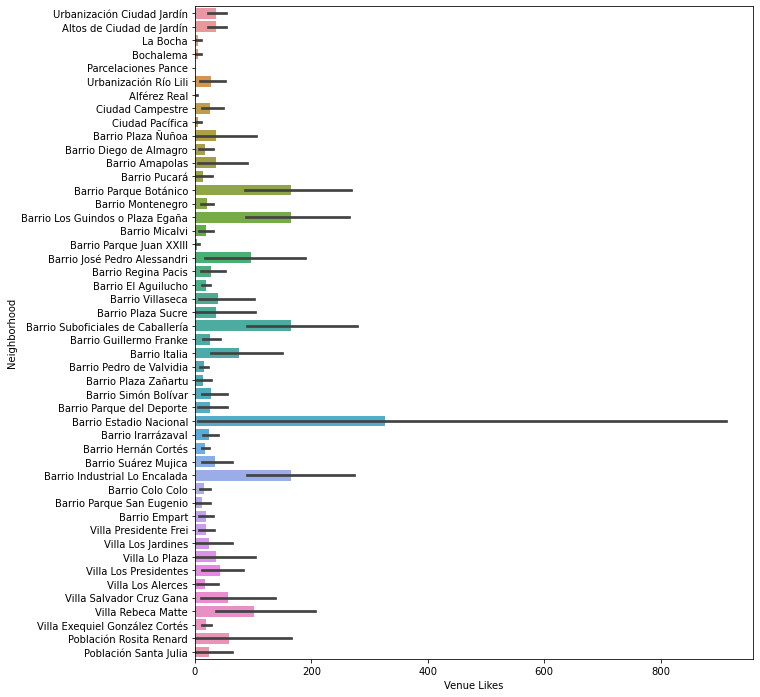

In [10]:
import seaborn as sns
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10,12

sns.barplot(x = "Venue Likes", y = "Neighborhood", data=venues)

## Methodology <a name="methodology"></a> 

In this project the effort will be on detecting areas of the communes of Ñuñoa and 22 that have a variety of places nearby, specially markets, and restaurants, and are highly recognized, using likes in Foursquare. The analysis will be limited by the zone around the neighborhoods covered by both communes.

In the first step data has been collected about location, type (category) and likes of every place around the 300 m of the neighborhoods.

The second step will be to explore places to identify promising areas with a variety of places in general and likes.

In the third and final step the focus will be on creating clusters of locations to find recommended places that meet basic requirements: at least 1 market/shop/store and 1 restaurant within 300 meters. Finally a map will show the resulting locations and the clusters (using k-means clustering) to analyze a recommendation for living in any of the cities and help with the decision making.


## Analysis and Results <a name="analysis"></a> 

First start with required imports 

In [11]:
import folium # map rendering library
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
from IPython.display import display
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

And get the locations of the boroughs for later use for example in the map

In [143]:
address = 'Ñuñoa, Santiago de Chile, CL'
geolocator = Nominatim(user_agent="nunoa_explorer")
nunoaLocation = geolocator.geocode(address)
nunoaLatitude = nunoaLocation.latitude
nunoaLongitude = nunoaLocation.longitude
print('The geograpical coordinates of Ñuñoa, Santiago de Chile, are {}, {}.'.format(nunoaLatitude, nunoaLongitude))

address = 'Comuna 22, Cali, CO'
geolocator = Nominatim(user_agent="cali_explorer")
c22Location = geolocator.geocode(address)
c22Latitude = c22Location.latitude
c22Longitude = c22Location.longitude
print('The geograpical coordinates of Comuna 22, Cali, are {}, {}.'.format(c22Latitude, c22Longitude))

The geograpical coordinates of Ñuñoa, Santiago de Chile, are -33.4743988, -70.6563224.
The geograpical coordinates of Comuna 22, Cali, are 3.3538506999999997, -76.53506996568721.


In [14]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Commune,Venue,Venue Id,Venue Likes,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,,,
Alférez Real,2,2,2,2,2,2,2,2,2
Altos de Ciudad de Jardín,20,20,20,20,20,20,20,20,20
Barrio Amapolas,10,10,10,10,10,10,10,10,10
Barrio Colo Colo,17,17,17,17,17,17,17,17,17
Barrio Diego de Almagro,8,8,8,8,8,8,8,8,8
Barrio El Aguilucho,19,19,19,19,19,19,19,19,19
Barrio Empart,4,4,4,4,4,4,4,4,4
Barrio Estadio Nacional,8,8,8,8,8,8,8,8,8
Barrio Guillermo Franke,15,15,15,15,15,15,15,15,15


In [15]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 113 uniques categories.


### Analyze Venues in Each Neighborhood

In [150]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

print(onehot.shape)
onehot.head()

(522, 114)


,Neighborhood,American Restaurant,Argentinian Restaurant,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Bakery,Bar,Bed & Breakfast,Beer Garden,Big Box Store,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Station,Café,Candy Store,Chinese Restaurant,Cocktail Bar,Coffee Shop,College Rec Center,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Diner,Distillery,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Lake,Latin American Restaurant,Lebanese Restaurant,Lingerie Store,Liquor Store,Malay Restaurant,Martial Arts School,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Music School,Music Venue,Nightclub,Other Great Outdoors,Outdoors & Recreation,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pub,Recreation Center,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,School,Shopping Mall,Shopping Plaza,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Theater,Track Stadium,Tree,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,Urbanización Ciudad Jardín,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Urbanización Ciudad Jardín,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Urbanización Ciudad Jardín,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Urbanización Ciudad Jardín,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Urbanización Ciudad Jardín,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Above, using one hot encoding the categories were replaced by 0 if non existent or 1, existent,  to below group rows by neighborhood and calculate the mean frequency of occurrence of each category

In [151]:
grouped = onehot.groupby('Neighborhood').mean().reset_index()
print(grouped.shape)
grouped.head()

(48, 114)


,Neighborhood,American Restaurant,Argentinian Restaurant,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Bakery,Bar,Bed & Breakfast,Beer Garden,Big Box Store,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Station,Café,Candy Store,Chinese Restaurant,Cocktail Bar,Coffee Shop,College Rec Center,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Diner,Distillery,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Lake,Latin American Restaurant,Lebanese Restaurant,Lingerie Store,Liquor Store,Malay Restaurant,Martial Arts School,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Music School,Music Venue,Nightclub,Other Great Outdoors,Outdoors & Recreation,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pub,Recreation Center,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,School,Shopping Mall,Shopping Plaza,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Theater,Track Stadium,Tree,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,Alférez Real,0.0,0.00,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,Altos de Ciudad de Jardín,0.0,0.05,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.000000,0.05,0.0,0.0,0.05,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.1,0.000000,0.05,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.050000,0.0,0.0,0.05,0.0,0.0,0.25,0.0,0.0,0.05,0.0,0.05,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.1,0.0
2,Barrio Amapolas,0.0,0.00,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.100000,0.00,0.0,0.1,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.200000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.1,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.1,0.00,0.0,0.0,0.0,0.0
3,Barrio Colo Colo,0.0,0.00,0.0,0.0,0.058824,0.000,0.058824,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.058824,0.00,0.0,0.0,0.00,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.058824,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.058824,0.00,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.058824,0.0,0.058824,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,Barrio Diego de Almagro,0.0,0.00,0.0,0.0,0.125000,0.125,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.12

Now let's filter the neighborhoods that meet the basic requirements of at least 1 market/shop/store and 1 restaurant

In [152]:
grouped['meets_base_requirements'] = np.nan

storeCols = grouped.filter(regex='arket|shop|Shop|store|Store').columns

meetsStores = grouped.loc[:, storeCols].apply(lambda x: x > 0)

restaurantCols = grouped.filter(regex='Restaurant|restaurant').columns

meetsRestaurants = grouped.loc[:, restaurantCols].apply(lambda x: x > 0)

for index in range(0, grouped.shape[0]):
    storeMet = meetsStores.iloc[index]
    restMet = meetsRestaurants.iloc[index]
    if storeMet.any() and restMet.any():
        grouped.loc[index,'meets_base_requirements'] = "yes"

grouped.dropna(inplace=True)
del grouped['meets_base_requirements']
print(grouped.shape)
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))
grouped.head()

(36, 114)
There are 113 uniques categories.


,Neighborhood,American Restaurant,Argentinian Restaurant,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Bakery,Bar,Bed & Breakfast,Beer Garden,Big Box Store,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Station,Café,Candy Store,Chinese Restaurant,Cocktail Bar,Coffee Shop,College Rec Center,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Diner,Distillery,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Lake,Latin American Restaurant,Lebanese Restaurant,Lingerie Store,Liquor Store,Malay Restaurant,Martial Arts School,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Music School,Music Venue,Nightclub,Other Great Outdoors,Outdoors & Recreation,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pub,Recreation Center,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,School,Shopping Mall,Shopping Plaza,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Theater,Track Stadium,Tree,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wings Joint,Yoga Studio
1,Altos de Ciudad de Jardín,0.0,0.05,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.05,0.0,0.000000,0.000000,0.050000,0.0,0.000000,0.05,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.1,0.000000,0.05,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.050000,0.0,0.000000,0.05,0.000000,0.0,0.250000,0.0,0.0,0.05,0.0,0.05,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.1,0.0
2,Barrio Amapolas,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.100000,0.000000,0.0,0.100000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.100000,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.200000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.1,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.1,0.00,0.0,0.0,0.0,0.0
3,Barrio Colo Colo,0.0,0.00,0.000000,0.0,0.058824,0.000000,0.058824,0.0,0.0,0.058824,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.058824,0.000000,0.0,0.000000,0.00,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.058824,0.000000,0.058824,0.0,0.0,0.0,0.0,0.0,0.058824,0.00,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.058824,0.0,0.058824,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,Barrio Diego de Almagro,0.0,0.00,0.000000,0.0,0.125000,0.125000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.125000,0.000000,0.0,0.000000,0.00,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.125000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.000000,0.125000,0.0,0.000000,0.0,0.000000,0.

To get a better picture of the frequencies for each neighborhood, below there are the top 5 most common venues for each one.

In [153]:
num_top_venues = 5

for hood in grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Altos de Ciudad de Jardín----
                    venue  freq
0              Restaurant  0.25
1      Italian Restaurant  0.10
2             Wings Joint  0.10
3            Burger Joint  0.05
4  Argentinian Restaurant  0.05


----Barrio Amapolas----
                  venue  freq
0  Fast Food Restaurant   0.2
1         Grocery Store   0.2
2        Farmers Market   0.1
3              Pie Shop   0.1
4           Bus Station   0.1


----Barrio Colo Colo----
           venue  freq
0    Coffee Shop  0.12
1    Pizza Place  0.06
2  Big Box Store  0.06
3    Music Venue  0.06
4    Bus Station  0.06


----Barrio Diego de Almagro----
              venue  freq
0       Coffee Shop  0.25
1       Bus Station  0.12
2  Asian Restaurant  0.12
3            Bakery  0.12
4          Pharmacy  0.12


----Barrio El Aguilucho----
                  venue  freq
0            Restaurant  0.11
1             Pet Store  0.11
2  Brazilian Restaurant  0.05
3     Recreation Center  0.05
4        Farmers Market  0.05


-

Now to prepare the data for clustering for the representative venues, add the most common venues to a Pandas dataframe

In [154]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [155]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Altos de Ciudad de Jardín,Restaurant,Italian Restaurant,Wings Joint,Shopping Mall,Juice Bar,Coffee Shop,Pizza Place,Pub,Café,Sandwich Place
2,Barrio Amapolas,Grocery Store,Fast Food Restaurant,Pie Shop,Metro Station,Bus Station,Chinese Restaurant,Tree,Farmers Market,Dance Studio,Department Store
3,Barrio Colo Colo,Coffee Shop,Shopping Plaza,Sushi Restaurant,Martial Arts School,Music Venue,Liquor Store,Pizza Place,Gym / Fitness Center,Bus Station,Big Box Store
4,Barrio Diego de Almagro,Coffee Shop,Pharmacy,Gym / Fitness Center,Asian Restaurant,Bakery,Bus Station,Park,Diner,Electronics Store,Distillery
5,Barrio El Aguilucho,Pet Store,Restaurant,Gym / Fitness Center,Liquor Store,Pharmacy,Coffee Shop,Plaza,Diner,Recreation Center,Chinese Restaurant


### Cluster Neighborhoods

First let´s find the best number of clusters using the elbow method

In [156]:
grouped_clustering = grouped.drop('Neighborhood', 1)

In [157]:
import folium # map rendering library
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
from math import sqrt
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    return wcss
    
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

sum_of_squares = calculate_wcss(grouped_clustering)
kclusters = optimal_number_of_clusters(sum_of_squares)

kclusters

8

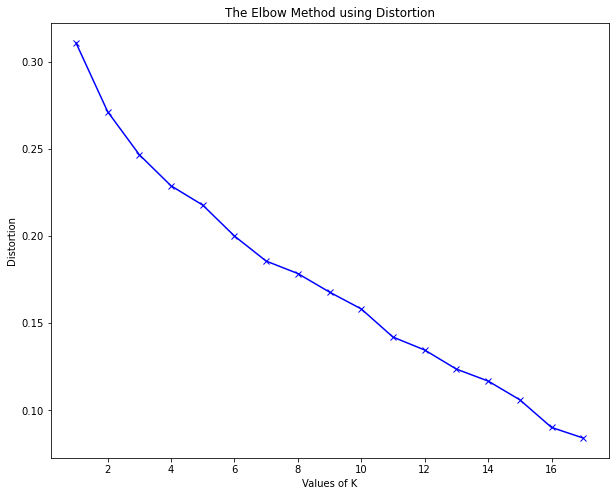

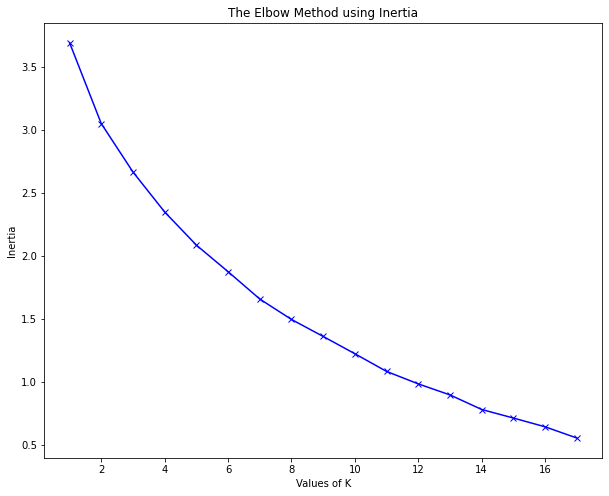

In [158]:
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt  

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,18) 
X = grouped_clustering

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)	 
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 


Now Run k-means to cluster the neighborhood using optimal clusters.

In [159]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([7, 5, 0, 0, 2, 4, 2, 1, 0, 0, 0, 1, 4, 2, 1, 0, 6, 1, 3, 6])

In [160]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

merged = df

merged = merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

likes_mean = venues[["Neighborhood", "Venue Likes"]].groupby("Neighborhood").mean()

merged = merged.join(likes_mean, on='Neighbourhood')

merged.dropna(inplace=True)

print(merged.shape)
merged.head() # check the last columns!

(36, 16)


,Commune,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Likes
0,"22, Cali, Colombia",Urbanización Ciudad Jardín,3.363480,-76.535500,7.0,Restaurant,Italian Restaurant,Wings Joint,Shopping Mall,Juice Bar,Coffee Shop,Pizza Place,Pub,Café,Sandwich Place,36.600000
1,"22, Cali, Colombia",Altos de Ciudad de Jardín,3.363480,-76.535500,7.0,Restaurant,Italian Restaurant,Wings Joint,Shopping Mall,Juice Bar,Coffee Shop,Pizza Place,Pub,Café,Sandwich Place,36.600000
5,"22, Cali, Colombia",Urbanización Río Lili,3.365010,-76.527620,7.0,Gym,Italian Restaurant,Coffee Shop,Restaurant,Furniture / Home Store,Breakfast Spot,Grocery Store,Gourmet Shop,Creperie,Cupcake Shop,27.714286
7,"22, Cali, Colombia",Ciudad Campestre,3.369900,-76.539450,0.0,American Restaurant,Supermarket,Hotel,Japanese Restaurant,Fast Food Restaurant,Mexican Restaurant,Department Store,Creperie,Pizza Place,Resort,25.500000
9,"Ñuñoa, Santiago de Chile",Barrio Plaza Ñuñoa,-33.461709,-70.585497,3.0,Fast Food Restaurant,Hot Dog Joint,Bakery,Food & Drink Shop,Yoga Studio,Creperie,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,37.000000


In [161]:
import branca

def getMap(data, latitude, longitude):
    # create map
    map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)
    
    order = data[["Cluster Labels", "Venue Likes"]].groupby("Cluster Labels").mean()
    order = order.sort_values("Venue Likes", ascending=True).reset_index()

    # set color scheme for the clusters
    colors_array = cm.YlOrRd(np.linspace(0, 1, kclusters))
    rainbow = [colors.rgb2hex(i) for i in colors_array]
    
    #legend
    colormap = branca.colormap.linear.YlOrRd_09.scale(0, order["Venue Likes"].max())
    colormap.caption = 'Neighborhood mean likes'
    colormap.add_to(map_clusters)

    # add markers to the map
    markers_colors = []
    for lat, lon, poi, cluster, likes, first, second, third in zip(data['Latitude'], data['Longitude'], data['Neighbourhood'], data['Cluster Labels'], data["Venue Likes"], data["1st Most Common Venue"], data["2nd Most Common Venue"], data["3rd Most Common Venue"]):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ', Likes: '+ str(likes) + ', Most common: '+first+', '+second+', '+third, parse_html=True)
        cluster_color = (rainbow[order.index.get_indexer_for((order[order["Cluster Labels"] == cluster].index))[0]])
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=(cluster_color),
            fill=True,
            fill_color=(cluster_color),
            fill_opacity=0.7).add_to(map_clusters)
       
    return map_clusters

In [162]:
getMap(merged, nunoaLatitude, nunoaLongitude)

In [163]:
getMap(merged, c22Latitude, c22Longitude)

### Examine Clusters

In [164]:
clusters_range = range(0,kclusters)
for c in clusters_range:
    print("Cluster "+str(c))
    display(merged.loc[merged['Cluster Labels'] == c, merged.columns[[1] + list(range(5, merged.shape[1]))]])

Cluster 0


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Likes
7,Ciudad Campestre,American Restaurant,Supermarket,Hotel,Japanese Restaurant,Fast Food Restaurant,Mexican Restaurant,Department Store,Creperie,Pizza Place,Resort,25.500000
10,Barrio Diego de Almagro,Coffee Shop,Pharmacy,Gym / Fitness Center,Asian Restaurant,Bakery,Bus Station,Park,Diner,Electronics Store,Distillery,17.000000
18,Barrio José Pedro Alessandri,Ice Cream Shop,Pharmacy,Coffee Shop,College Rec Center,Burrito Place,Sandwich Place,Shopping Mall,Movie Theater,Bowling Alley,Boutique,96.050000
25,Barrio Italia,Coffee Shop,Ice Cream Shop,Snack Place,Gourmet Shop,Furniture / Home Store,Latin American Restaurant,Martial Arts School,Dance Studio,Peruvian Restaurant,Gym / Fitness Center,74.850000
35,Barrio Irarrázaval,Japanese Restaurant,Liquor Store,Peruvian Restaurant,Music Venue,Nightclub,Pub,Coffee Shop,Tea Room,Bar,Asian Restaurant,24.923077
39,Barrio Colo Colo,Coffee Shop,Shopping Plaza,Sushi Restaurant,Martial Arts School,Music Venue,Liquor Store,Pizza Place,Gym / Fitness Center,Bus Station,Big Box Store,15.764706
40,Barrio Parque San Eugenio,Pizza Place,Food Truck,Convenience Store,Hot Dog Joint,Park,Dessert Shop,Bus Line,Burger Joint,Malay Restaurant,Pharmacy,12.727273
48,Villa Salvador Cruz Gana,Italian Restaurant,Shopping Plaza,Grocery Store,Furniture / Home Store,Japanese Restaurant,Latin American Restaurant,Liquor Store,Martial Arts School,Music Venue,Pharmacy,56.722222


Cluster 1


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Likes
13,Barrio Parque Botánico,Italian Restaurant,Sandwich Place,Concert Hall,Rock Club,Ice Cream Shop,Fish & Chips Shop,Distillery,Mexican Restaurant,Middle Eastern Restaurant,Cupcake Shop,165.65
15,Barrio Los Guindos o Plaza Egaña,Italian Restaurant,Sandwich Place,Concert Hall,Rock Club,Ice Cream Shop,Fish & Chips Shop,Distillery,Mexican Restaurant,Middle Eastern Restaurant,Cupcake Shop,165.65
23,Barrio Suboficiales de Caballería,Italian Restaurant,Sandwich Place,Concert Hall,Rock Club,Ice Cream Shop,Fish & Chips Shop,Distillery,Mexican Restaurant,Middle Eastern Restaurant,Cupcake Shop,165.65
26,Barrio Pedro de Valvidia,Sandwich Place,Chinese Restaurant,Cosmetics Shop,Sushi Restaurant,Candy Store,Breakfast Spot,Lingerie Store,Boutique,Bus Station,Diner,15.25
38,Barrio Industrial Lo Encalada,Italian Restaurant,Sandwich Place,Concert Hall,Rock Club,Ice Cream Shop,Fish & Chips Shop,Distillery,Mexican Restaurant,Middle Eastern Restaurant,Cupcake Shop,165.65


Cluster 2


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Likes
12,Barrio Pucará,Asian Restaurant,Pet Store,Bakery,Dessert Shop,Grocery Store,Chinese Restaurant,Café,Fast Food Restaurant,Cupcake Shop,Dance Studio,14.125000
14,Barrio Montenegro,Bakery,Pet Store,Plaza,Café,Dessert Shop,South American Restaurant,Chinese Restaurant,Coffee Shop,Asian Restaurant,Park,20.363636
19,Barrio Regina Pacis,Bakery,Pet Store,Chinese Restaurant,Pharmacy,Gym,Music School,Soccer Field,Café,Sushi Restaurant,Diner,26.800000
20,Barrio El Aguilucho,Pet Store,Restaurant,Gym / Fitness Center,Liquor Store,Pharmacy,Coffee Shop,Plaza,Diner,Recreation Center,Chinese Restaurant,18.789474
21,Barrio Villaseca,Pizza Place,Chinese Restaurant,Bakery,Kids Store,Snack Place,Flower Shop,Fried Chicken Joint,Sushi Restaurant,Pharmacy,Bar,39.692308
29,Barrio Simón Bolívar,Fast Food Restaurant,Chinese Restaurant,Cosmetics Shop,Coffee Shop,Gym,Bakery,Sushi Restaurant,Diner,Falafel Restaurant,Electronics Store,27.875000
36,Barrio Hernán Cortés,Pet Store,Sushi Restaurant,Restaurant,Pharmacy,Bakery,Plaza,Café,Brazilian Restaurant,Chinese Restaurant,Soccer Field,17.700000
45,Villa Los Presidentes,Bakery,Fast Food Restaurant,Salon / Barbershop,Gym,Asian Restaurant,Coffee Shop,Café,Sushi Restaurant,Diner,Bookstore,42.363636
50,Villa Exequiel González Cortés,Restaurant,Martial Arts School,Plaza,Café,Liquor Store,Lebanese Restaurant,Flower Shop,Sushi Restaurant,Fried Chicken Joint,Bakery,19.615385


Cluster 3


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Likes
9,Barrio Plaza Ñuñoa,Fast Food Restaurant,Hot Dog Joint,Bakery,Food & Drink Shop,Yoga Studio,Creperie,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,37.0
22,Barrio Plaza Sucre,Fast Food Restaurant,Hot Dog Joint,Bakery,Food & Drink Shop,Yoga Studio,Creperie,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,37.0
44,Villa Lo Plaza,Fast Food Restaurant,Hot Dog Joint,Bakery,Food & Drink Shop,Yoga Studio,Creperie,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,37.0


Cluster 4


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Likes
16,Barrio Micalvi,Coffee Shop,Peruvian Restaurant,Chinese Restaurant,Sushi Restaurant,Yoga Studio,Farmers Market,Creperie,Cupcake Shop,Dance Studio,Department Store,19.75
41,Barrio Empart,Coffee Shop,Peruvian Restaurant,Chinese Restaurant,Sushi Restaurant,Yoga Studio,Farmers Market,Creperie,Cupcake Shop,Dance Studio,Department Store,19.75


Cluster 5


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Likes
11,Barrio Amapolas,Grocery Store,Fast Food Restaurant,Pie Shop,Metro Station,Bus Station,Chinese Restaurant,Tree,Farmers Market,Dance Studio,Department Store,36.0
51,Población Rosita Renard,Grocery Store,Fast Food Restaurant,Park,Pie Shop,Gym,Gym / Fitness Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,58.0


Cluster 6


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Likes
27,Barrio Plaza Zañartu,Pizza Place,Brewery,Peruvian Restaurant,Plaza,Bakery,Chinese Restaurant,Bus Station,Farmers Market,Cupcake Shop,Dance Studio,13.500000
31,Barrio Parque del Deporte,Pie Shop,Chinese Restaurant,Food Truck,South American Restaurant,Bus Line,Music Venue,Falafel Restaurant,Cosmetics Shop,Creperie,Cupcake Shop,25.500000
42,Villa Presidente Frei,Bus Line,Bakery,Burger Joint,Pie Shop,Bus Station,Plaza,Metro Station,Flea Market,Chinese Restaurant,Electronics Store,19.727273


Cluster 7


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Likes
0,Urbanización Ciudad Jardín,Restaurant,Italian Restaurant,Wings Joint,Shopping Mall,Juice Bar,Coffee Shop,Pizza Place,Pub,Café,Sandwich Place,36.600000
1,Altos de Ciudad de Jardín,Restaurant,Italian Restaurant,Wings Joint,Shopping Mall,Juice Bar,Coffee Shop,Pizza Place,Pub,Café,Sandwich Place,36.600000
5,Urbanización Río Lili,Gym,Italian Restaurant,Coffee Shop,Restaurant,Furniture / Home Store,Breakfast Spot,Grocery Store,Gourmet Shop,Creperie,Cupcake Shop,27.714286
49,Villa Rebeca Matte,Restaurant,Hostel,Coffee Shop,Italian Restaurant,Japanese Restaurant,Latin American Restaurant,Dance Studio,Music Venue,Park,Performing Arts Venue,100.900000


## Discussion <a name="discussion"></a>

There are several problems with the dataset from the Foursquare API. The venues that it returns are only near the coordinates given for each specific neighborhood. That means it does not necessarily cover every place in that neighborhood and may not represent the real limits but only those venues around the Geocoder library associated with each name. For this project we are assuming the area searched around the neighborhoods gives an understanding of the neighborhoods but certainly some important zones may be omitted.
Another issue is that there may be limitations on the real available spots requested, some venues may have relocated to another area or not exist any more; also, a real venue may not be registered in Foursquare.
As a side note some of the locations of the neighborhoods did not reflect the actual coordinates.

The likes that some people give to a place may not indicate necessarily that it is a recommended place to live in but provides additional data to take into account. Further expansion on other relevant measures should provide better insights to give a recommendation, such as security and quality of life, prices; a full investigation, that other projects such as municipalities have done.

## Conclusion <a name="conclusion"></a> 

People have for centuries migrated to cities and at a point make the decision to invest in a place to live. As such having a tool that expands their view points and can give a recommendation on which specific place to pick and the reasons using large datasets, can take to a more informed and satisfying decision making.

Using clustering algorithms to group and structure places with similar characteristics, identifying the most common places, filtering to meet conditions desired and showing the likes that each zone on two different boroughs of two different cities of two different countries should help having a view in which migrants and other interested people can analyze the places at least on these aspects.

At the moment of writing this project Ñuñoa offers more variety in places, likes and clusters, it is bigger and has more habitants. Borough 22 in Cali has also a variety of likes and clusters, but smaller and less options since there are less neighborhoods. Elbow method reflects the clusters are not very distinctive so clusters are not significantly different. Likes may offer help in this area.